In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, date
plt.style.use('ggplot')

In [44]:
# Tải lên dữ liệu Customer Demographics từ file excel

cust_demo = pd.read_excel('Raw_data.xlsx', sheet_name='CustomerDemographic')

In [45]:
# Kiểm tra 5 bản ghi đầu tiên từ dữ liệu New Customer

cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [46]:
# Thông tin về các cột và kiểu dữ liệu của dữ liệu New Customer

cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

<b>Ta thấy kiểu dữ liệu cột dữ liệu DOB không phải là định dạng datetime64, nên cần phải chuyển từ kiểu dữ liệu object sang datetime64. </br>
Sau khi thay đổi kiểu dữ liệu của cột DOB thì các kiểu dữ liệu của các cột dữ liệu đặt trưng đã ổn. Tuy nhiên, 'default' là những cột không liên quan. Do đó, chúng cần được loại bỏ.</b>

## Tổng số bản ghi

In [47]:
# Tổng số hàng và cột trong tập dữ liệu

print('Total records (row) in the dataset: {}'.format(cust_demo.shape[0]))
print('Total columns in the dataset: {}'.format(cust_demo.shape[1]))

Total records (row) in the dataset: 4000
Total columns in the dataset: 13


## Các cột số và các cột không phải số

In [48]:
# Lấy ra các cột số
df_numeric = cust_demo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)

# Lấy ra các cột không phải số
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


## 1. Thay đổi kiểu dữ liệu và loại bỏ các cột không liên quan

<b>Thay đổi kiểu dữ liệu cho cột DOB, từ object sang datetime64</b>

In [49]:
# Thay đổi kiểu dữ liệu

cust_demo['DOB'] = cust_demo['DOB'].astype('datetime64[ns]')

<b>"Default" là một cột không liên quan. Do đó, nó nên được loại bỏ.</b>

In [50]:
# Loại bỏ cột dữ liệu thừa

cust_demo.drop(labels={'default'}, axis=1, inplace=True)

In [51]:
# Kiểm tra

cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

## 2. Kiểm tra giá trị bị thiếu

Kiểm tra xem tập dữ liệu có tồn tại bất kỳ giá trị thiếu nào không. Nếu giá trị thiếu xuất hiện cho một cột cụ thể, tùy thuộc vào tình huống thì: 
- Cột đó có thể bị loại bỏ (trong trường hợp một số lượng lớn dữ liệu bị thiếu) 
- Có thể loại bỏ giá trị thiếu đó (trong trường hợp một số lượng ít dữ liệu bị thiếu)
- Một giá trị phù hợp sẽ được điền vào cột có giá trị thiếu

In [52]:
# Tổng số giá trị bị thiếu

cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [53]:
# Tỉ lệ phần trăm giá trị bị thiếu

cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

Sau khi thực hiện kiểm tra ở trên chúng ta thấy có các cột như: <b>last_name, DOB, job_title, job_industry_category, tenure</b> có giá trị null.

### 2.1. Cột Last Name

<b>Vì tất cả khách hàng đều có một customer_id và first_name, nên tất cả khách hàng đều có thể được nhận dạng. Do đó, không có vấn đề nếu không có last_name. Chúng ta sẽ điền last_name rỗng bằng "None".</b>

In [54]:
cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

In [55]:
# Các bản ghi có giá trị rỗng của cột last_name

cust_demo[cust_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [56]:
# Điền các last_name rỗng bằng 'None'

cust_demo['last_name'] = cust_demo.loc[:, 'last_name'].fillna('None')

In [57]:
# Kiểm tra lại số lượng last_name rỗng

cust_demo['last_name'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho cột Last Name.

### 2.2. Ngày sinh (DOB)

In [58]:
# Lọc giá trị rỗng trong cột DOB

cust_demo[cust_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,Yes,NaN


In [59]:
# Tỉ lệ phần trăm giá trị rỗng trong cột DOB

round(cust_demo['DOB'].isnull().mean()*100)

2

<b>Dữ liệu ngày sinh bị thiếu ít hơn 5%, nên chúng ta có thể loại bỏ các bản ghi bị thiếu</b>

In [60]:
# Lấy chỉ mục của các bản ghi mà ngày sinh (DOB) là null.

dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [61]:
# Xóa các bản ghi đó

cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)

In [62]:
# Kiểm tra lại số lượng giá trị null

cust_demo['DOB'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho ngày sinh (DOB).

### Tạo cột tuổi(Age) để kiểm tra sự không nhất quán trong dữ liệu.

In [63]:
# Hàm tính tuổi của khách hàng tính đến ngày hôm nay.

def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust_demo['Age'] = cust_demo['DOB'].apply(age)

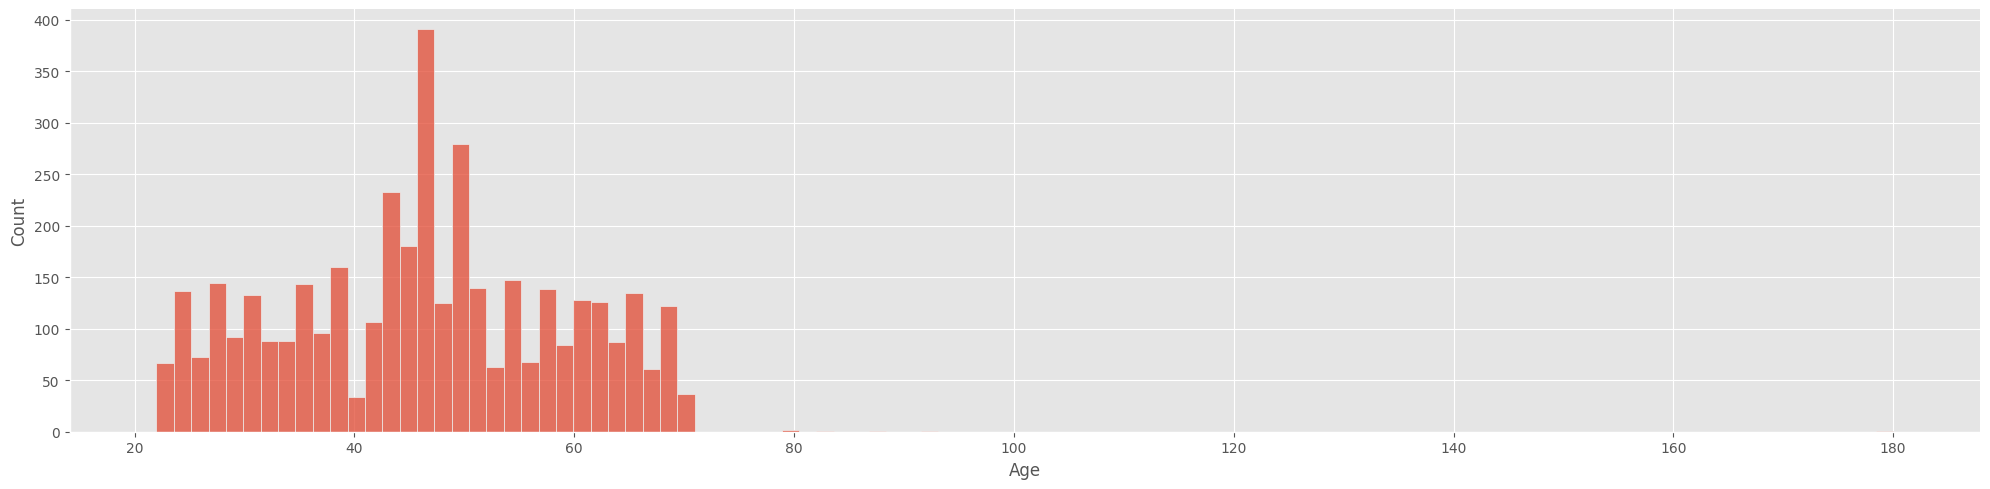

In [64]:
# Trực quan hóa để tìm phân phối Tuổi.

sns.displot(cust_demo['Age'], bins=100, height=5, aspect=4)

<b>Thống kê mô tả của cột Age</b>

In [65]:
cust_demo['Age'].describe().round(3)

count    3913.000
mean       46.271
std        12.801
min        22.000
25%        37.000
50%        46.000
75%        56.000
max       180.000
Name: Age, dtype: float64

Ở đây, chúng ta thấy chỉ có 1 khách hàng có tuổi là 180. Rõ ràng đây là một giá trị ngoại lệ vì 75% của cột Age là 56.

In [66]:
# Lọc các bản ghi trong cột Age có giá trị lơn hơn 100

cust_demo[cust_demo['Age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


Chúng ta tìm được một khách hàng có tuổi là 180, đây là một ngoại lệ. Do đó, chúng ta cần loại bỏ bản ghi này.

In [67]:
age_index_drop = cust_demo[cust_demo['Age']>100].index

cust_demo.drop(index=age_index_drop, inplace=True , axis=0)

### 2.3. Cột Tenure

<b>Khi Ngày sinh(DOB) là Null, Tenure cũng là Null. Do đó, sau khi loại bỏ các giá trị DOB Null khỏi DataFrame, các giá trị Tenure Null cũng đã được loại bỏ.</b>

In [68]:
cust_demo['tenure'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho cột tenure.

### 2.4. Cột Job Title

In [69]:
# Lọc các giá trị rỗng trong cột job_title

cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,57
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,48
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,69
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0,46
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0,45
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0,49
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,No,7.0,59


In [70]:
# Tỉ lệ phần trăm giá trị rỗng trong cột job_title

round(cust_demo['job_title'].isnull().mean()*100)

13

<b>Vì tỷ lệ giá trị thiếu của cột job_title là 13%, chúng ta sẽ thay thế các giá trị null bằng "Missing".</b>

In [71]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)

C:\Users\User\AppData\Local\Temp\ipykernel_7824\389922831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)


In [72]:
# Kiểm tra có còn giá trị rỗng trong cột không

cust_demo['job_title'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho cột job_title.

### 2.5. Cột Job Industry Category

In [73]:
# Lọc các giá trị rỗng trong cột job_industry_category

cust_demo[cust_demo['job_industry_category'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,62
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,47
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,62
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,NaN,Mass Customer,N,Yes,11.0,55
3973,3974,Misha,Ranklin,Female,82,1961-02-11,Technical Writer,NaN,Affluent Customer,N,Yes,9.0,63
3975,3976,Gretel,Chrystal,Female,0,1957-11-20,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0,66
3982,3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,N,Yes,9.0,59


In [74]:
# Tỉ lệ phần trăm giá trị rỗng trong cột job_industry_category

round(cust_demo['job_industry_category'].isnull().mean()*100)

17

<b>Vì tỷ lệ giá trị thiếu của cột job_industry_category là 17%, chúng ta sẽ thay thế các giá trị null bằng "Missing".</b>

In [75]:
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)

C:\Users\User\AppData\Local\Temp\ipykernel_7824\2917623295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)


In [76]:
# Kiểm tra có còn giá trị rỗng trong cột không

cust_demo['job_industry_category'].isnull().sum()

0

Hiện tại không có giá trị thiếu nào cho cột job_industry_category.

<b>Cuối cùng, không còn Giá trị Thiếu nào trong tập dữ liệu.</b>

In [77]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [78]:
# Tổng số bản ghi sau khi loại bỏ các giá trị thiếu

print('Total records after removing Missing Values: {}'.format(cust_demo.shape[0]))

Total records after removing Missing Values: 3912


## 3. Kiểm tra sự không nhất quán trong dữ liệu.

Chúng ta sẽ kiểm tra xem liệu có dữ liệu không nhất quán hoặc dữ liệu nhập sai / lỗi chính tả trong các cột phân loại.</br>
Các cột cần được kiểm tra là: <b>'gender', 'wealth_segment', 'deceased_indicator', 'owns_car'.</b>

### 3.1. Cột Gender

In [79]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

Ở đây có dữ liệu không nhất quán trong cột gender. Có các lỗi chính tả và lỗi nhập sai. Đối với giá trị cột gender có giá trị <b>"M" sẽ được thay thế bằng "Male", "F" sẽ được thay thế bằng "Female" và "Femal" sẽ được thay thế bằng "Female".</b>

In [80]:
def replace_gender_names(gender):
    
    # Đặt qui định giới tính là "Male" và "Female".
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

# Áp dụng hàm trên vào cột "gender"
cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [81]:
cust_demo['gender'].value_counts().reset_index()

,gender,count
0,Female,2039
1,Male,1873


Bây giờ, dữ liệu không nhất quán, lỗi chính tả và lỗi nhập sai trong cột gender đã được loại bỏ.

### 3.2. Cột Wealth Segment

Không có <b>dữ liệu không nhất quán</b> trong cột <b>wealth_segment</b>

In [82]:
cust_demo['wealth_segment'].value_counts().reset_index()

,wealth_segment,count
0,Mass Customer,1954
1,High Net Worth,996
2,Affluent Customer,962


### 3.3. Cột Deceased Indicator

Không có <b>dữ liệu không nhất quán</b> trong cột <b>deceased_indicator</b>

In [83]:
cust_demo['deceased_indicator'].value_counts().reset_index()

,deceased_indicator,count
0,N,3910
1,Y,2


### 3.4. Cột Owns a Car

Không có <b>dữ liệu không nhất quán</b> trong cột <b>owns_car</b>

In [84]:
cust_demo['owns_car'].value_counts().reset_index()

,owns_car,count
0,Yes,1974
1,No,1938


## 4. Kiểm tra trùng lặp

Chúng ta cần đảm bảo rằng không có sự trùng lặp của bản ghi trong tập dữ liệu. Điều này có thể dẫn đến lỗi trong phân tích dữ liệu do chất lượng dữ liệu kém. Nếu có các hàng dữ liệu trùng lặp, chúng ta cần loại bỏ những bản ghi đó.</br>
Để kiểm tra sự trùng lặp của các bản ghi, trước tiên chúng ta cần loại bỏ cột khóa chính của tập dữ liệu, sau đó áp dụng hàm drop_duplicates() được cung cấp bởi Python.

In [85]:
# Xóa cột khóa chính, tức là customer_id, và lưu vào một dataframe tạm thời.
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


<b>Vì cả hai giá trị đều giống nhau, nên không có bản ghi trùng lặp trong tập dữ liệu.</b>

## 5. Xuất tập dữ liệu Customer Demographic đã được làm sạch sang định dạng csv

Tập dữ liệu Customer Demographic đã được làm sạch. Do đó, chúng ta có thể xuất dữ liệu sang định dạng CSV để tiếp tục phân tích dữ liệu của phân khúc khách hàng bằng cách kết hợp nó với các bảng khác.

In [86]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)